In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import math
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
x=iris.data

In [4]:
y=iris.target

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_df = DataFrame(x,columns=['sepal length','sepal width','petal length','petal width'])

In [7]:
iris_target =DataFrame(y,columns=['species'])

In [8]:
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_target.tail()

,species
145,2
146,2
147,2
148,2
149,2


In [10]:
def flower(num):
    if num==0:
        return 'Setosa'
    if num==1:
        return 'Versicolour'
    if num==2:
        return 'Virginica'

In [11]:
iris_target['species'] = iris_target['species'].apply(flower)

In [12]:
iris_target.tail()

,species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [13]:
iris_data=pd.concat([iris_df,iris_target],axis=1)

In [14]:
iris_data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


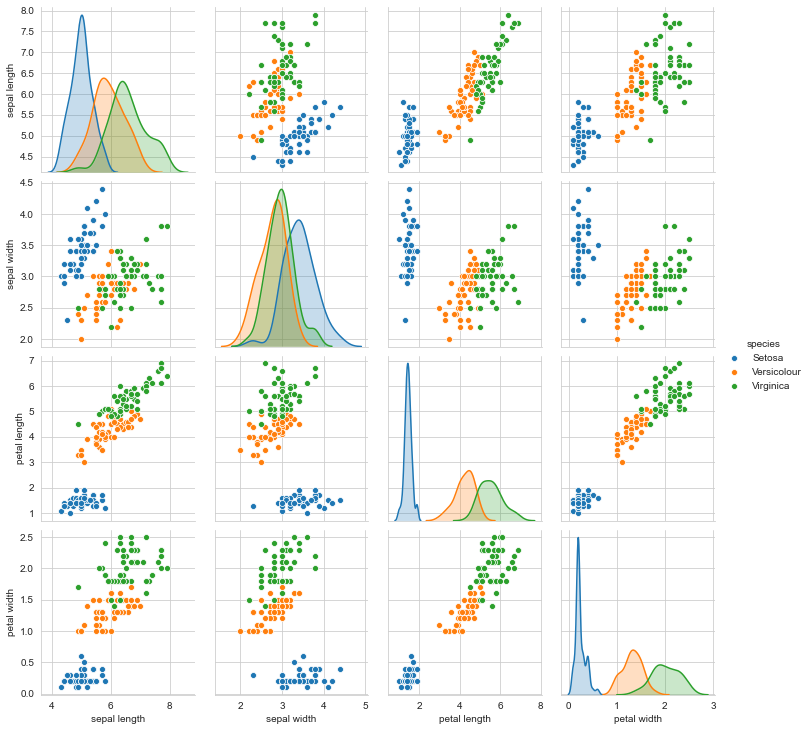

In [15]:
sns.pairplot(data=iris_data,hue='species')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


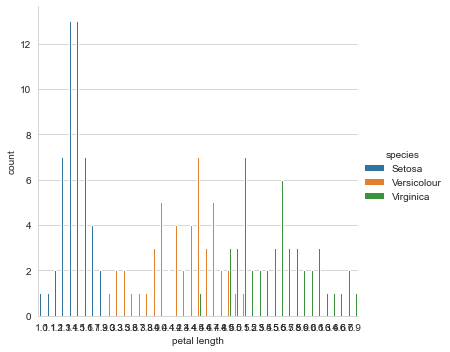

In [16]:
sns.factorplot('petal length', kind='count', data=iris_data, hue='species')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
log = LogisticRegression()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.4,random_state=3)

In [24]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
x_train

array([[5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.8, 3.2, 5.9, 2.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.3, 5.7, 2.1],
       [5.7, 3. , 4.2, 1.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [7.7, 3.8, 6.7, 2.2],
       [5.8, 2.8, 5.1, 2.4],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.9, 3.1, 4.9, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [5.9, 3. , 4.2, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 3

In [26]:
from sklearn import metrics

In [29]:
y_pred = log.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [33]:
metrics.accuracy_score(y_test,y_pred)

0.9666666666666667

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [43]:
knny_pred = knn.predict(x_test)

In [44]:
metrics.accuracy_score(y_test,knny_pred)

0.95

In [48]:
k=range(1,21)
acc ={}
a=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knny_pred = knn.predict(x_test)
    acc[i]=metrics.accuracy_score(y_test,knny_pred)
    a.append(metrics.accuracy_score(y_test,knny_pred))

In [49]:
acc

{1: 0.9666666666666667,
 2: 0.9666666666666667,
 3: 0.95,
 4: 0.95,
 5: 0.9333333333333333,
 6: 0.95,
 7: 0.95,
 8: 0.95,
 9: 0.95,
 10: 0.9333333333333333,
 11: 0.9333333333333333,
 12: 0.95,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.95,
 17: 0.9666666666666667,
 18: 0.95,
 19: 0.95,
 20: 0.95}

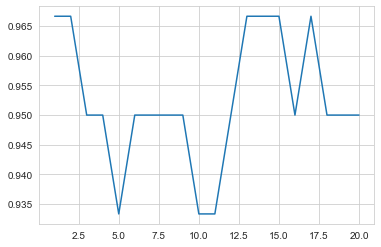

In [50]:
plt.plot(k,a)